In [1]:
# imports
import pandas as pd
import numpy as np
import os
import pandasql
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Set Path
raw_data_path = os.path.join(os.path.pardir)
file_path = os.path.join(raw_data_path,"Exam - 1 EDA","KSEA.csv")

In [4]:
#Create dataframe from csv file
ksea_df = pd.read_csv(file_path)
ksea_df.head()

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
0  2014-7-1                77               60               94   
1  2014-7-2                70               58               81   
2  2014-7-3                64               57               71   
3  2014-7-4                66               57               75   
4  2014-7-5                66               56               76   

   average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
0                54                73               45               94   
1                54                73               43               93   
2                54                74               44               92   
3                54                74               43               92   
4                55                74               47               91   

   record_min_temp_year  record_max_temp_year  actual_precipitation  \
0                  1948                  2014                   0.0   
1                  1954                  2015                   0.0   
2                  1954                  2015                   0.0   
3                  1949                  2015                   0.0   
4                  1951                  1958                   0.0   

   average_precipitation  record_precipitation  
0                   0.03                  0.75  
1                   0.03                  0.50  
2                   0.03                  0.47  
3                   0.03                  0.57  
4                   0.03                  0.64

In [32]:
ksea_df.tail()

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
360  2015-6-26                77               64               89   
361  2015-6-27                78               63               92   
362  2015-6-28                74               65               83   
363  2015-6-29                74               63               84   
364  2015-6-30                73               59               87   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
360                53                72               46               90   
361                53                72               45               92   
362                54                72               45               91   
363                54                73               45               93   
364                54                73               43               96   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
360                  1949                  2006                  0.00   
361                  1949                  2015                  0.00   
362                  1949                  1995                  0.01   
363                  1949                  1987                  0.00   
364                  1949                  1995                  0.00   

     average_precipitation  record_precipitation  
360                   0.03                  0.32  
361                   0.04                  0.61  
362                   0.04                  0.79  
363                   0.03                  0.64  
364                   0.04                  0.84

In [11]:
#Check for null values
print(ksea_df.count())
ksea_df.info()

date                     365
actual_mean_temp         365
actual_min_temp          365
actual_max_temp          365
average_min_temp         365
average_max_temp         365
record_min_temp          365
record_max_temp          365
record_min_temp_year     365
record_max_temp_year     365
actual_precipitation     365
average_precipitation    365
record_precipitation     365
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 13 columns):
date                     365 non-null object
actual_mean_temp         365 non-null int64
actual_min_temp          365 non-null int64
actual_max_temp          365 non-null int64
average_min_temp         365 non-null int64
average_max_temp         365 non-null int64
record_min_temp          365 non-null int64
record_max_temp          365 non-null int64
record_min_temp_year     365 non-null int64
record_max_temp_year     365 non-null int64
actual_precipitation     365 non-null float64
average_precipitat

In [59]:
ksea_df['date'] = pd.to_datetime(ksea_df['date'])

In [60]:
type(ksea_df.date)

pandas.core.series.Series

In [62]:
ksea_df.head(3)

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
0 2014-07-01                77               60               94   
1 2014-07-02                70               58               81   
2 2014-07-03                64               57               71   

   average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
0                54                73               45               94   
1                54                73               43               93   
2                54                74               44               92   

   record_min_temp_year  record_max_temp_year  actual_precipitation  \
0                  1948                  2014                   0.0   
1                  1954                  2015                   0.0   
2                  1954                  2015                   0.0   

   average_precipitation  record_precipitation  
0                   0.03                  0.75  
1                   0.03                  0.50  
2                   0.03                  0.47

In [13]:
#The mean, standard devidation, quartiles, min and max values for each temperature
ksea_df.describe()

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count        365.000000       365.000000       365.000000        365.000000   
mean          56.542466        48.369863        64.189041         45.046575   
std           10.437226         8.707561        12.867879          7.313657   
min           30.000000        23.000000        37.000000         35.000000   
25%           49.000000        43.000000        54.000000         37.000000   
50%           56.000000        49.000000        62.000000         44.000000   
75%           65.000000        55.000000        75.000000         52.000000   
max           80.000000        65.000000        96.000000         57.000000   

       average_max_temp  record_min_temp  record_max_temp  \
count        365.000000       365.000000       365.000000   
mean          60.317808        31.293151        76.131507   
std           10.737519        12.273400        13.671950   
min           45.000000         0.000000        54.000000   
25%           50.000000        22.000000        63.000000   
50%           59.000000        33.000000        76.000000   
75%           70.000000        42.000000        89.000000   
max           77.000000        50.000000       103.000000   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count            365.000000            365.000000            365.000000   
mean            1962.709589           1983.230137              0.102548   
std               16.624424             18.870777              0.241871   
min             1948.000000           1945.000000              0.000000   
25%             1951.000000           1967.000000              0.000000   
50%             1955.000000           1985.000000              0.000000   
75%             1970.000000           1999.000000              0.060000   
max             2011.000000           2015.000000              2.200000   

       average_precipitation  record_precipitation  
count             365.000000            365.000000  
mean                0.102712              1.107178  
std                 0.062362              0.648280  
min                 0.010000              0.110000  
25%                 0.050000              0.660000  
50%                 0.090000              0.960000  
75%                 0.160000              1.410000  
max                 0.240000              5.020000

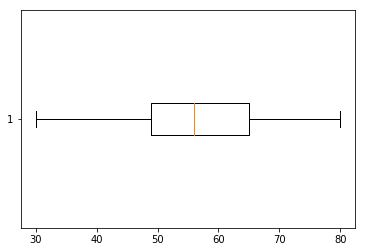

In [18]:
#Check for outliers
plt.boxplot(ksea_df.actual_mean_temp, vert= False)
plt.show()

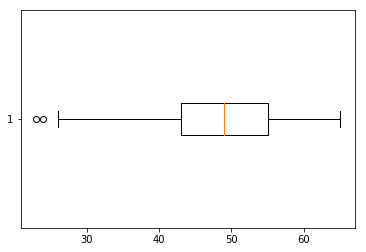

In [19]:
plt.boxplot(ksea_df.actual_min_temp, vert= False)
plt.show()

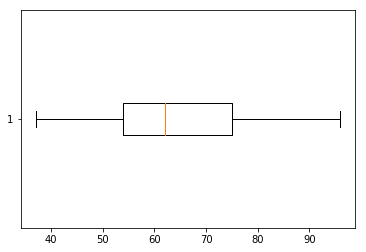

In [20]:
plt.boxplot(ksea_df.actual_max_temp, vert= False)
plt.show()

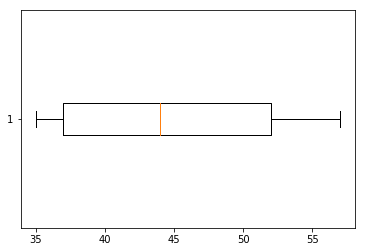

In [22]:
plt.boxplot(ksea_df.average_min_temp, vert= False)
plt.show()

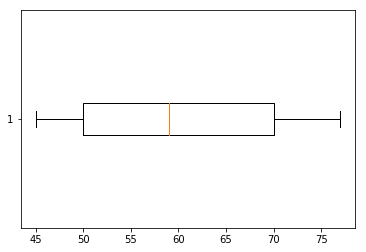

In [24]:
plt.boxplot(ksea_df.average_max_temp, vert= False)
plt.show()

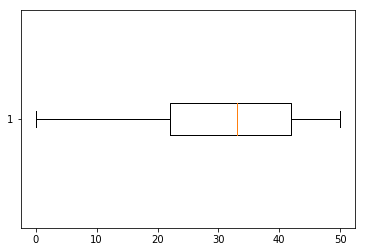

In [26]:
plt.boxplot(ksea_df.record_min_temp, vert= False)
plt.show()

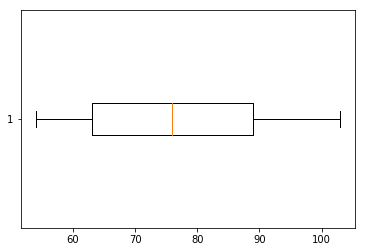

In [27]:
plt.boxplot(ksea_df.record_max_temp, vert= False)
plt.show()

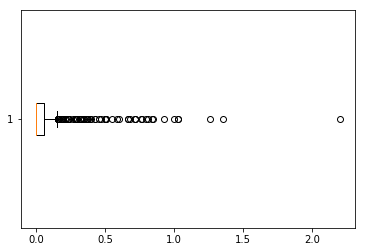

In [29]:
plt.boxplot(ksea_df.actual_precipitation, vert= False)
plt.show()

In [5]:
#Three very extreme outliers are:
ksea_df[ksea_df.actual_precipitation > 1.1]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
113  2014-10-22                57               53               60   
150  2014-11-28                47               38               55   
257   2015-3-15                47               43               51   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
113                45                57               34               70   
150                37                48               17               59   
257                39                54               30               65   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
113                  1950                  1965                  1.26   
150                  1952                  1999                  1.35   
257                  1955                  2010                  2.20   

     average_precipitation  record_precipitation  
113                   0.12                  1.26  
150                   0.21                  1.55  
257                   0.12                  2.20

In [6]:
ksea_df['actual_precipitation'].count()

365

In [ ]:
ksea_df[ksea_df.actual_precipitation > 0]

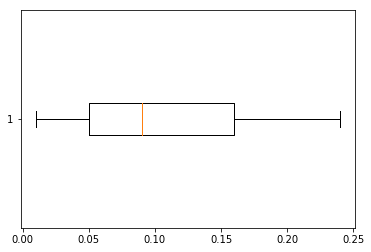

In [30]:
plt.boxplot(ksea_df.average_precipitation, vert= False)
plt.show()

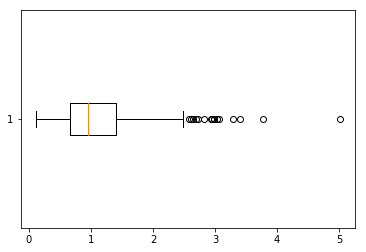

In [31]:
plt.boxplot(ksea_df.record_precipitation, vert= False)
plt.show()

In [156]:
#Two very extreme outliers are:
ksea_df[ksea_df.record_precipitation > 3.5]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
111 2014-10-20                58               54               61   
155 2014-12-03                41               32               50   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
111                45                58               29               69   
155                36                47               27               60   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
111                  1949                  1987                  0.46   
155                  1994                  1965                  0.00   

     average_precipitation  record_precipitation temp_category  
111                   0.12                  5.02        Medium  
155                   0.20                  3.77           Low

The analysis done uptill now has:

-> 365 observations and each observation is a day in a year

-> The dataset is weather information for one year, July 2014 to June 2015

-> There are no missing values in the dataset

-> There are extreme outliers present in actual precipitation and record precipitation variables but not in any other variables

-> The temperature units is assumed to be in °F as the temperature goes upto 96 and it is impossible to use any other units

In [35]:
ksea_df.columns

Index(['date', 'actual_mean_temp', 'actual_min_temp', 'actual_max_temp',
       'average_min_temp', 'average_max_temp', 'record_min_temp',
       'record_max_temp', 'record_min_temp_year', 'record_max_temp_year',
       'actual_precipitation', 'average_precipitation',
       'record_precipitation'],
      dtype='object')

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


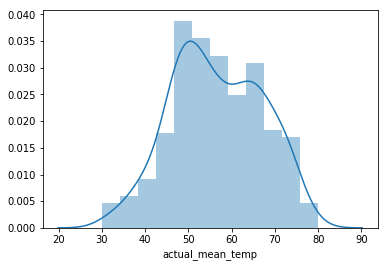

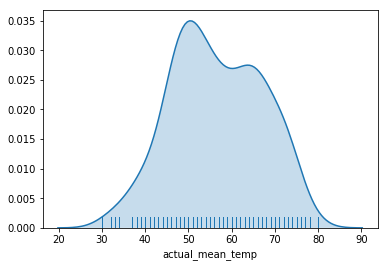

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


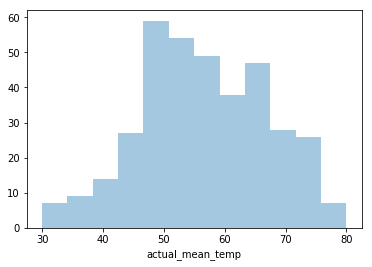

<Figure size 432x288 with 0 Axes>

In [39]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.actual_mean_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_mean_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_mean_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for actual_mean_temp throughout the year, we can infer that the data has a slightly right skewed distribution. The most occurences of temp is apporximately around 48-50 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


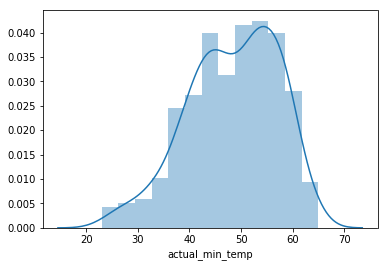

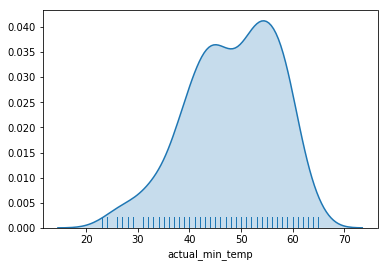

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


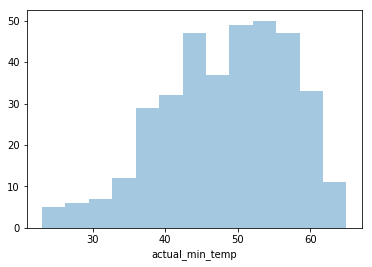

<Figure size 432x288 with 0 Axes>

In [49]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.actual_min_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_min_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_min_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for actual_min_temp throughout the year, we can infer that the data has a slightly left skewed distribution. The most occurences of temp is approximately around 49-58 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


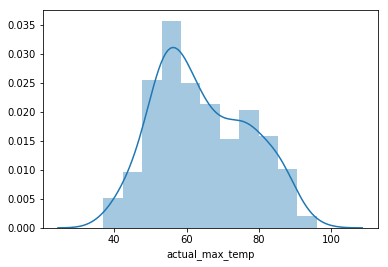

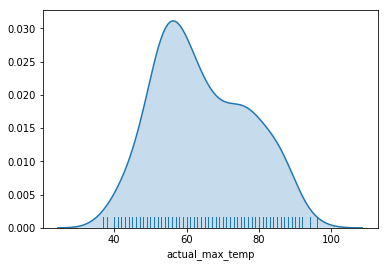

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


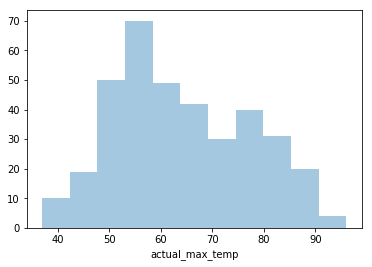

<Figure size 432x288 with 0 Axes>

In [50]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.actual_max_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_max_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_max_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for actual_max_temp throughout the year, we can infer that the data has a slightly right skewed distribution. The most occurences of temp is approximately around 55-57 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


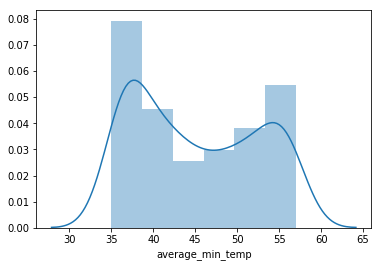

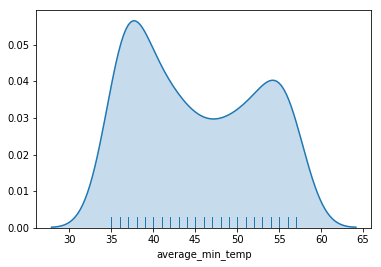

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


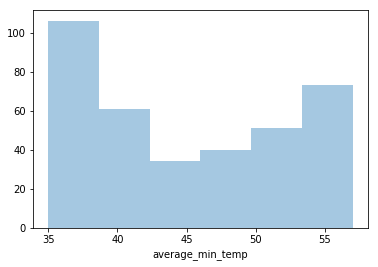

<Figure size 432x288 with 0 Axes>

In [42]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.average_min_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.average_min_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.average_min_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for average_min_temp throughout the year, we can infer that the data has no normal distribution and the observation count is peaking on the left most and right most and has a low count in the middle. The most occurences of temp is approximately around 35-37 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


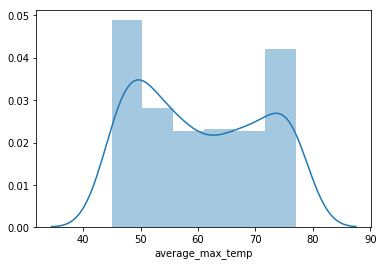

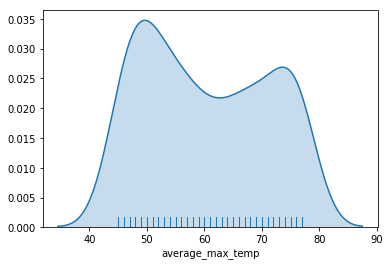

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


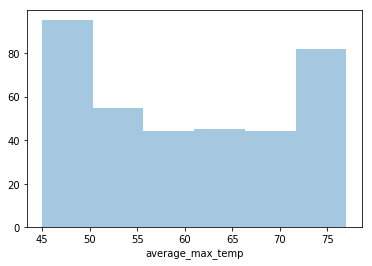

<Figure size 432x288 with 0 Axes>

In [43]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.average_max_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.average_max_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.average_max_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for average_max_temp throughout the year, we can infer that the data has no normal distribution and the observation count is peaking on the left most and right most and has a low count in the middle. The most occurences of temp is approximately around 45-50 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


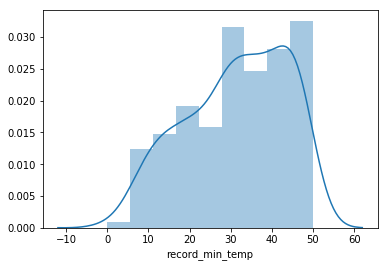

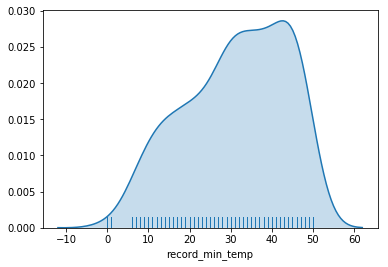

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


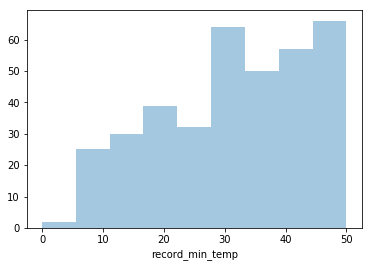

<Figure size 432x288 with 0 Axes>

In [44]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.record_min_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.record_min_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.record_min_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for record_min_temp throughout the year, we can infer that the data has a slightly left skewed distribution. The most occurences of temp is approximately around 29-33 and 47-50 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


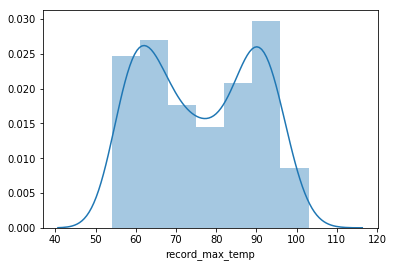

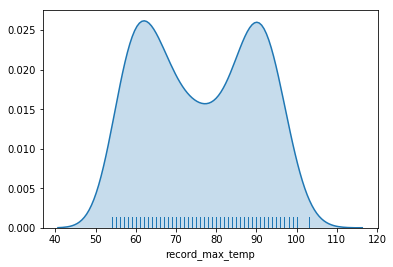

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


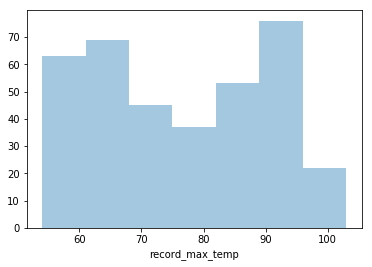

<Figure size 432x288 with 0 Axes>

In [45]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.record_max_temp)
plt.show()
plt.clf()
sns.distplot(ksea_df.record_max_temp,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.record_max_temp,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for record_max_temp throughout the year, we can infer that the data has no normal distribution and the observation count is peaking on the left and right and has a low count in the middle. The most occurences of temp is approximately around 90-95 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


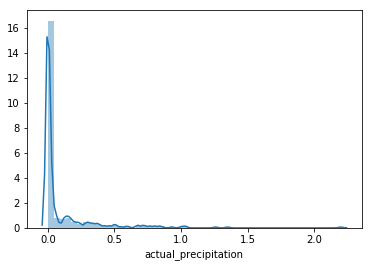

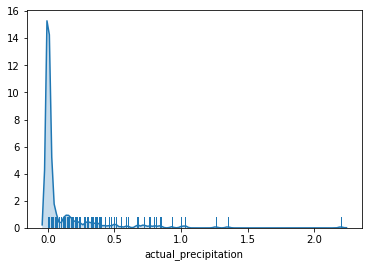

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


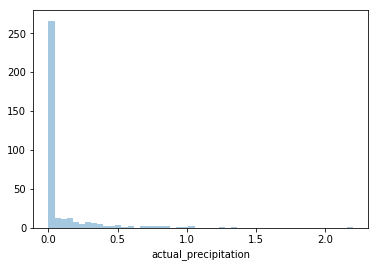

<Figure size 432x288 with 0 Axes>

In [46]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.actual_precipitation)
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_precipitation,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.actual_precipitation,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for actual_precipitation throughout the year, we can infer that the data has a heavily right skewed distribution with many outliers. The most occurences of precipiation is approximately around 0.0 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


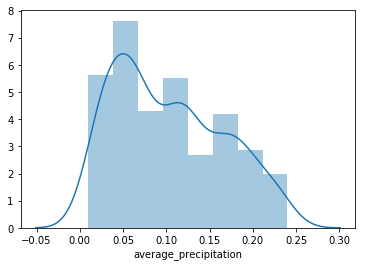

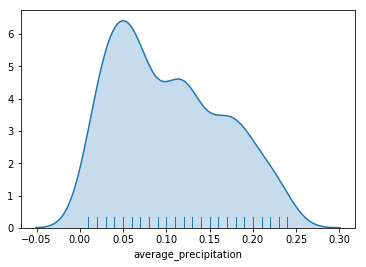

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


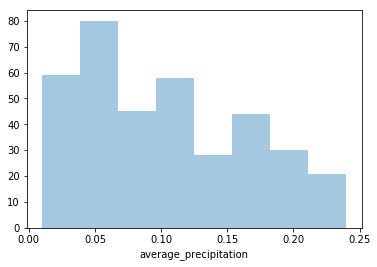

<Figure size 432x288 with 0 Axes>

In [47]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.average_precipitation)
plt.show()
plt.clf()
sns.distplot(ksea_df.average_precipitation,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.average_precipitation,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for average_precipitation throughout the year, we can infer that the data has a  right skewed distribution. The most occurences of precipiation is approximately around 0.05 from the histogram

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


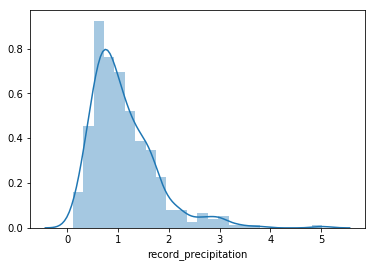

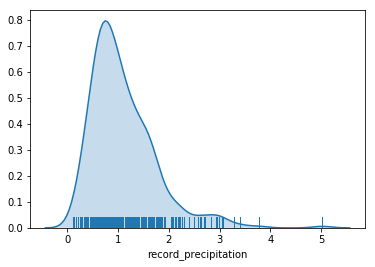

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


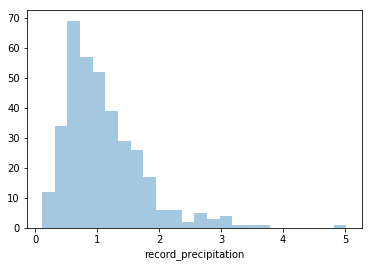

<Figure size 432x288 with 0 Axes>

In [48]:
#Plots to check distribution of the variables
sns.distplot(ksea_df.record_precipitation)
plt.show()
plt.clf()
sns.distplot(ksea_df.record_precipitation,
            hist = False,
            rug=True,
            kde_kws={'shade':True})
plt.show()
plt.clf()
sns.distplot(ksea_df.record_precipitation,
            kde= False)
plt.show()
plt.clf()

From the histogram and the kernel density plots for actual_precipitation throughout the year, we can infer that the data has a  right skewed distribution with few outliers. The most occurences of precipiation is approximately around 0.07-0.09 from the histogram

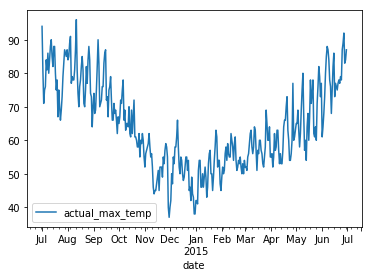

In [85]:
#Plot a graph for date vs actual_max_temp

ksea_df[['date','actual_max_temp']].set_index('date').plot()

plt.show()

In [69]:
ksea_df.actual_max_temp.max()

96

In [71]:
ksea_df[ksea_df.actual_max_temp == 96]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
41 2014-08-11                80               64               96   

    average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
41                56                77               46               96   

    record_min_temp_year  record_max_temp_year  actual_precipitation  \
41                  1954                  2014                  0.02   

    average_precipitation  record_precipitation  
41                   0.03                  0.32

A) The day with the maximum temperature recorded is 11th August 2014 with 96°F

In [75]:
print(ksea_df.record_precipitation.max())
print(ksea_df.actual_precipitation.max())


5.02
2.2


In [77]:
ksea_df[ksea_df.record_precipitation == 5.02]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
111 2014-10-20                58               54               61   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
111                45                58               29               69   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
111                  1949                  1987                  0.46   

     average_precipitation  record_precipitation  
111                   0.12                  5.02

In [79]:
ksea_df[ksea_df.actual_precipitation == 2.2]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
257 2015-03-15                47               43               51   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
257                39                54               30               65   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
257                  1955                  2010                   2.2   

     average_precipitation  record_precipitation  
257                   0.12                   2.2

 B) The highest rainfall or snow precipitation recorded was 5.02 since 1880. Since the data has the information for just the years 2014 and 2015, and there is no variable that represents max or min precipitation recorded ever for a particular year, we will not be able to infer the exact year from the data. However, the day which recorded the max precipitation was 20th October.


The day that recorded the maximum precipitation for the time period between July 2014 to June 2015 is 15th March 2015 with 2.2 as precipitation.

In [157]:
ksea_df.record_max_temp.max()

103

In [159]:
ksea_df[ksea_df.record_max_temp == 103].record_max_temp_year

28    2009
Name: record_max_temp_year, dtype: int64

The year that recorded the maximum temperature was 2009

In [95]:
#Adding categories
ksea_df['temp_category'] = ''

ksea_df.loc[(ksea_df.actual_max_temp >= 75), 'temp_category'] = 'High'
ksea_df.loc[(ksea_df.actual_max_temp >= 55) & (ksea_df.actual_max_temp < 75) , 'temp_category'] = 'Medium'
ksea_df.loc[(ksea_df.actual_max_temp < 55), 'temp_category'] = 'Low'

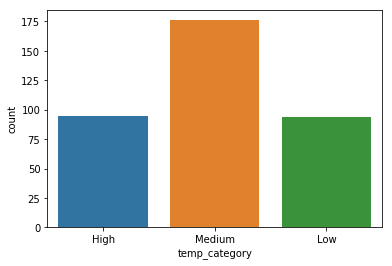

In [103]:
sns.countplot(data=ksea_df,
                x = 'temp_category')

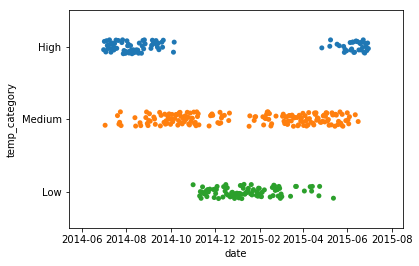

In [109]:
sns.stripplot(data=ksea_df,
              x='date',
              y='temp_category',
              jitter=True)

plt.show()

In [105]:
ksea_df.temp_category.value_counts()

Medium    176
High       95
Low        94
Name: temp_category, dtype: int64

In [111]:
high_percentage = 95/(176+94+95)*100
print(high_percentage)

medium_percentage = 176/(176+94+95)*100
print(medium_percentage)

low_percentage = 94/(176+94+95)*100
print(low_percentage)

26.027397260273972
48.21917808219178
25.753424657534246


C)
The temperature categories are High Medium and Low

-> High is categorized as on or above 75°F of actual max temperature

-> Medium is categorized as between 55°F and 75°F, 55°F included, of the actual max temperature

-> Low is categorized as below 55°F, of the actual max temperature




From the stripplot we observe:

-> The temperature is High at the begining of July fluctuates between high and medium untill the end of September

-> In October and November the temperature is usually Medium

-> From December to March it is usually low with a few days fluctuating to medium.

-> From April to Beginning of June the temperature is stable at medium

-> In June we can see that the temperature is High




The Percentages of Medium Low and High are:

-> 48.22 % of a year is Medium, which is the highest

-> 26.03 % of the year is High

-> 25.75 % of the year is Medium

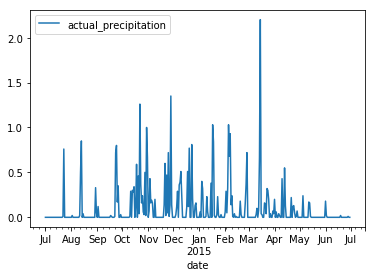

In [113]:
ksea_df[['date','actual_precipitation']].set_index('date').plot()

In [118]:
ksea_df_last6 = ksea_df[ksea_df.date > '2014-12-31']
ksea_df_last6.date.count()

181

In [124]:
ksea_df_last6.actual_precipitation.sum()

16.240000000000002

In [129]:
ksea_df_last6.actual_precipitation.max()

2.2

In [126]:
ksea_df_last6.actual_max_temp.max()

92

In [128]:
ksea_df_last6[ksea_df_last6.actual_max_temp == 92]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
361 2015-06-27                78               63               92   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
361                53                72               45               92   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
361                  1949                  2015                   0.0   

     average_precipitation  record_precipitation temp_category  
361                   0.04                  0.61          High

D) Total rainfall precipitation recorded for the last six months is 16.24

The hottest day recorded from last six months with temperature 92°F is 27th June 2015

The heaviest rainfall recieved was 15th March 2015

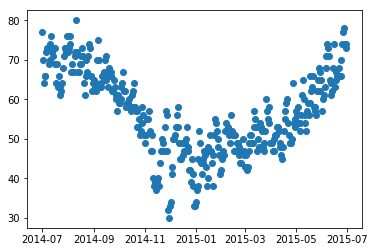

In [136]:
#Plot a graph for date vs actual_mean_temp

plt.plot_date(ksea_df.date, ksea_df.actual_mean_temp)

plt.show()

E) 
From the above scatter plot, we can observe:

-> Temperature is consistent during the months September and October in the range of 60s

-> Temperature is very inconsistent during the months November , December and January

-> Temperature is pretty consistent during March and then it consistently increases


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


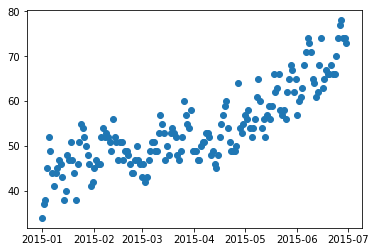

In [152]:
ksea_df_last6['date'] = pd.to_datetime(ksea_df_last6['date'])
plt.plot_date(ksea_df_last6.date, ksea_df_last6.actual_mean_temp)

plt.show()

The last six months, the temperature increases from months January to June

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


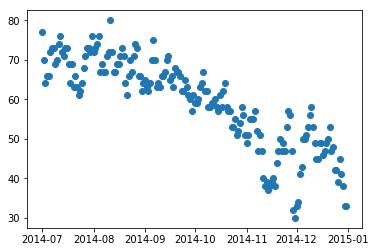

In [154]:
ksea_df_first6 = ksea_df[ksea_df.date <= '2014-12-31']
ksea_df_first6['date'] = pd.to_datetime(ksea_df_first6['date'])
plt.plot_date(ksea_df_first6.date, ksea_df_first6.actual_mean_temp)

plt.show()

The first six months, the temperature decreases gradually from july to December